# <font color='gray'> Lab sessions 2 and 3: Regression </font>

## Introduction 

The aim of this lab is to get experience with **regression problems**, the concepts of **under/over-fitting**, and **cross-validation**. This lab will use both **python** and **Weka**. 

- This is the manual for a two-week lab exercise (*week 3* and *week 4*). 
- It is also the **first assignment** and **should be delivered by the end of week 4** (for a contribution of 6% of your overall grade).
- Questions in <font color = 'red'>**red**</font> (well, actually, in <font color = 'maroon'>**this red!**</font>) are assessed towards your final grade.


## Important notes about grading: 

- **PLAGIARISM** <ins>is an irreversible non-negotiable failure in the course</ins> (if in doubt of what constitutes plagiarism, ask!). 
- The total assessed coursework is worth 30% of your final grade.
- There will be 10 lab sessions and 5 assignments.
- One assignment will cover 2 consecutive lab sessions and will be worth 6 marks (percentages of your final grade).
- The deadline for submitting each coursework is 12 days after the first lab session (Tuesday).
- There will be no opportunity to submit after the deadline (the submission link will disappear).
- The report should answer the <font color = 'red'>**questions in</font><font color = "maroon"> red**</font> only. This should be a separate file in **pdf format** (so **NOT** *doc, docx, notebook* etc.). It should be well identified with your name, student number, assignment number (for instance, Assignment 1), module, and marked with question numbers. 
- No other means of submission other than the appropriate QM+ link is acceptable at any time (so NO email attachments, etc.)

## 0. Regression and Over-fitting


The	 point	 of	 this	exercise	is	 to	 understand	
>i)	**over-fitting**;
<br>
>ii)	how **over-fitting affects	 train	 and	 test	 error** differently,	 and;
<br>
iii)	 how	 it	 depends	 on	 the **complexity of the model**.

0.  First, let's "load" our data. The first exercise is very simple, so we are going to give the data explicitly as the following:

In [1]:
# traing data
xTrain =[0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800]
yTrain =[1.1492, 0.3582, 1.9013, 0.9487, 1.3096, 0.9646, 0.1079, 1.1262, 0.6131, 1.0951]
 
# testing date
xTest =[0.1100, 0.2300, 0.1800, 0.3500, 0.5200, -0.4400, -0.6900, -0.2400, 0.4300, -0.4100, 0.3300, 0.8800, -0.4300, 0.5600, 0.6600, -0.0100, -0.8300, 0.5700, 0.3400, 0.6700]
yTest =[1.0569, 1.0647, 0.9575, 1.2097, 0.8371, 0.8573, 0.6128, 1.1087, 0.9253, 0.9788, 1.0590, 1.6263, 0.7660, 1.0799, 1.3341, 0.6867, 0.3657, 1.1747, 1.0440, 1.1315]


 1. We have loaded four variables. What are they? Let's explore one of them:

In [2]:
print(xTrain)
print(len(xTrain))

[0.3, -0.77, 0.9, -0.04, 0.74, -0.58, -0.92, -0.21, -0.54, 0.68]
10


---
> **Q0:** Note that the dimensions of the `xTrain` are 10x1. 
This means we are dealing with a ?-dimensional regression problem with ?? instances.

> **A0:** 1-dim 10 instances(*Recall that you can use this space to write your answer by double-click on this cell. This is only for your own note-taking. The answers to the red questions -- hence, not this one, for instance! -- should be written in a separate document and submitted through QM+ as a single **pdf** file, as we detailed above.*) 
---

2. Let's plot our train and test data-sets. The x-axis will be our predictor attribute and the y-axis is the label (target). The train and test data-sets are plotted with different markers:

In [3]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(7,7))
plt.plot(xTrain, yTrain, 'o', label="Train Data")
plt.plot(xTest, yTest, '*', label="Test Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
# plt.gca().set_aspect('equal')
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

<Figure size 640x480 with 1 Axes>

3. The following code **fits** a 1$^{st}$ order polynomial (i.e., a simple line) to the presented data using least squares. This means that it finds the line that predicts the label in the train data with minimum mean squared error (MSE). We also print the corresponding equation with the estimated values for the parameters of that equation (i.e., the learned model) along with the MSE in the train and test data. 

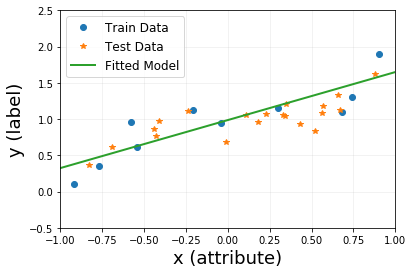

The learned model is:
  
0.6621 x + 0.9865
---
Train MSE:  0.05434
Test MSE:  0.04653


In [4]:
import numpy as np

order = 1
p = np.poly1d(np.polyfit(xTrain, yTrain, order))
#p_test = np.poly1d(np.polyfit(xTest,yTest,order))
t = np.linspace(-1, 1, 201)

plt.plot(xTrain, yTrain, 'o', label="Train Data")
plt.plot(xTest, yTest, '*', label="Test Data")
plt.plot(t, p(t), '-', label="Fitted Model", linewidth=2)
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
# plt.gca().set_aspect('equal')
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

print('The learned model is:\n {}\n---'.format(p))
    
MSE_Train = sum((p(x) - y)**2 for x, y in zip(xTrain, yTrain))/len(yTrain)
print('Train MSE: {:8.5f}'.format(MSE_Train))

MSE_Test = sum((p(x) - y)**2 for x, y in zip(xTest, yTest))/len(yTest) #0
print('Test MSE: {:8.5f}'.format(MSE_Test))

---
> **Q1:** There is an intentional mistake in the code: the mean-squared-error (MSE) for the test dataset is computed wrongly. Fix it! 

  *Hint 1: you can get the idea from how the MSE for the train data is computed, and write the code for the MSE_Test accordingly.*

  *Hint 2: if you are still in doubt, look at the code cell in the next task, you can actually find it there, but use it as a double-check.*

  *Hint 3: note that indentation is very important in Python. There are no `begin` and `end` or curly brackets { } in Python, and code blocks are demarcated by their indentation (loops, if statements, body of functions, etc).*

> **Q2:** Which function in the above code is responsible for finding the best model for a given order (i.e., fit the model)? 


> **A2:** np.poyfit()

> **Q3:** Edit the code so that you find the best model for higher degrees of polynomials. That is, fit 2$^{nd}$, 3$^{rd}$, ..., 9$^{th}$ order polynomials to the training data. What do you observe about the different fits in terms of their match to training and test data, respectively? 

> **A3:**  Train MSE decreases but Test MSE increases
--- 

4. Let's put all of the polynomial orders side-by-side for an easier comparison! Run the following code block **twice** (to get the tabular view). You can then change between the tabs. Note the train MSE and test MSE for each fit.


In [5]:
# Don't forget to run this cell twice to get the tabs (some weird bug with the 
# colab interface it seems!) If you don't get the tab view, it is fine, you can
# stil analyse the outputs!

from google.colab import widgets

orders = range(1,10)
t = np.linspace(-1, 1, 201)

tb = widgets.TabBar([str(order) for order in orders])
for order in orders:
  with tb.output_to(str(order), select= (order < 2)):
    p = np.poly1d(np.polyfit(xTrain, yTrain, int(order)))

    plt.plot(xTrain, yTrain, 'o', label='Train data')
    plt.plot(xTest, yTest, '*', alpha=0.6, label='Test data')
    plt.plot(t, p(t), '-', alpha=0.8, label='Learned model', linewidth=2)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y",fontsize=14)
    plt.xlim(-1,1)
    plt.ylim(-0.5,2.5)
    # plt.gca().set_aspect('equal')
    plt.grid(alpha=0.2)
    plt.legend(loc='upper left', fontsize=12)
    plt.show()
    
    print('The learned (fitted) model is:\n {}\n---'.format(p))

    MSE_Train = sum((p(x) - y)**2 for x, y in zip(xTrain, yTrain))/len(yTrain)
    print('Train MSE: {:8.5f}'.format(MSE_Train))

    MSE_Test = sum((p(x) - y)**2 for x, y in zip(xTest, yTest))/len(yTest)
    print('Test MSE: {:8.5f}'.format(MSE_Test))

ModuleNotFoundError: No module named 'google.colab'

5. Let's make the comparison of MSE values more systematic: let's save the MSE of each model for both train and test data into two lists and plot them. The x-axis is the order of the polynomial of the fitted model, a measure of complexity (flexibility) of the model:

In [0]:
orders = range(1,10)
MSE_Trains = dict.fromkeys(orders)
MSE_Tests = dict.fromkeys(orders)

for order in orders:
  p = np.poly1d(np.polyfit(xTrain, yTrain, int(order)))
  MSE_Trains[order] = sum((p(x) - y)**2 for x, y in zip(xTrain, yTrain))/len(yTrain)
  MSE_Tests[order] = sum((p(x) - y)**2 for x, y in zip(xTest, yTest))/len(yTest)
  
plt.plot(orders, MSE_Trains.values(), '--o', label='MSE Train', linewidth=2)
plt.plot(orders, MSE_Tests.values(), '--*', label='MSE Test', linewidth=2)

plt.title('''Fig 0: Comparison of Train and Test MSE (no regularisation).\n
You should be able to describe and explain the general trend in each graph, 
and identify the cases of underfitting and overfitting.\n''', fontsize=14)
plt.xlabel("Order (degree of the fitted polynomial)", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.xlim(1,9)
plt.ylim(0,0.1)
plt.grid(alpha=0.2)
plt.legend(fontsize=14)
plt.show()

In [0]:
print(MSE_Trains)
print(MSE_Tests)
print('Min Train MSE: {:1.30f}'.format(min(MSE_Trains.values())))
print('Min Test MSE: {:8.5f}'.format(min(MSE_Tests.values())))

---
---
#### <font color="maroon"><b>Exercise 0: </b> Which polynomial has the lowest `train` MSE? Which one has the lowest `test` MSE? <b>[0.5 mark]</b> </font>

Answer: Order 9 has minimum value MSE for training (7.737735706301106e-27) and 
Order 3 has minimum value MSE for testing (0.016317893338617738) 


####<font color="maroon"><b>Exercise 1: </b> What trend do you observe when you analyse the dependence of train and test MSE on the polynomial order? First describe the observed trends, and then explain them. <b>[1 mark]</b>  </font>

The Mean Square Error (MSE) for both training and testing data sharply decreases with 3rd degree polynomial and reaches to an approximate value of 0.02. This trend of lower MSE continues with both Training and Testing MSE diverging in opposite directions as we increase the degree of polynomial until degree 8 and then overshoots for polynomial degree 9. 
The covergence can be seen at polynomial degree 3 before this the model is too ridgid and at degree 9 we can see overfitting as the model has memorised all the points instaed of learning.

####<font color="maroon"><b>Exercise 2: </b> Identify the models that are suffering from <u>under-fitting</u> and the ones suffering from <u>over-fitting</u>. Justify your choice based on your observations and use the theory that we have learnt to explain it. <b>[0.5 mark]</b>  </font>

Underfitting can be seen with first degree polynomial the model is to ridgid and genralisation for newer data is poor as the MSE for train is high. 

Overfitting can be seen after degree 7 polynomial as the model is too generalised and as the model tries to fit all the point of the given Training data the learning capability is lost instead it is trying to memorise the traing data, which is why it fails misreably and we see higher Test and Training MSE.training

####<font color="maroon"><b>Exercise 3: </b> Which model would you pick as the best one amongst these 9 models? What are the parameter(s) and hyper-parameter(s) of your chosen model? <b>[0.5 mark]</b>  </font>
---
---

Polynomial model of degree 3 and the model is y =  1.326 x^3 - 0.09076 x^2 - 0.1449 x + 1.004

PARAMETERS: w3 = 1.326, w2 = 0.09076, w3 = 0.1449 

HYPER-PARAMETERS = degree 3 polynomial

## 1. Regularisation 

The aim of this exercise is to see the behind-the-scenes code for linear and polynomial regression, that corresponds to the 
equations	seen in the lecture. Moreover, we will see the fantastic role that regularisation technique can play in fighting against over-fitting and getting models with improved generalisation (lower variance).

0. The following script defines a function that we will use to generate training and test samples from an underlying true model that we want to learn! The true model is a polynomial, and we generate our dataset instances by sampling from this true model and adding some noise to it. (Note that this is of course an artificial set-up, with the purpose of this lab exercise, to see the effect of regularisation. In a practical scenario, we of course don't know the true model and our task is to indeed "learn" it!). 

  Run the following code cell to load the function **definition** (note that there will not be any output). 



In [0]:
# You don't have to be concerned about the detail of the following function!

def utilCreatePolyData(nTrain=10, 
                       nTest=20,
                       PolynomialCoefficients=[1,0,0,1],
                       rndseed=0):
  '''
  Function to generate some artificials samples for our test and train data.
  The data is generated by sampling from a true underlying model as a polynomial 
  and adding some noise (Gaussian with mean zero and `sigma`=0.1) to them.
  
  Parameters:
    nTrain (int) : number of the training data points to generate
    nTest (int) : number of the test data points to generate
    PolynomialCoefficients (list) : the coefficients of the true polynomial
    rndseed (int) : seed for the random number generator --for repeatability--
  
  Retunrns:
    xTrain, yTrain (list) : training attributes and labels (with length of `nTrain`)
    xTest, yTest (list) : test attributes and labels (with length of `nTest`)
    xTrue, yTrue (list) : samples from the true underlying model (length of 201)
  '''
  
  np.random.seed(rndseed) 
  
  # just to make sure we have enough samples to choose from:
  total_number_of_samples = max(201, 10*(nTrain+nTest))
  
  xTrue  = np.linspace(start=-1, stop=1, num=total_number_of_samples)
  yTrue  = np.polynomial.polynomial.polyval(xTrue, PolynomialCoefficients)
  sigma    = 0.1
  idx    = np.random.permutation(np.arange(total_number_of_samples))
  idxTrain = idx[0:nTrain]
  xTrain = xTrue[idxTrain] 
  yTrain = yTrue[idxTrain] + np.random.randn(nTrain)*sigma
  
  idxTest = idx[nTrain:(nTrain+nTest)]
  xTest = xTrue[idxTest]
  yTest = yTrue[idxTest] + np.random.randn(nTest)*sigma

  return xTrain, yTrain, xTest, yTest, xTrue, yTrue

# for testing the function:
xTrain, yTrain, xTest, yTest, xTrue, yTrue = utilCreatePolyData(nTrain=3, nTest=2)
print(xTrain, yTrain, xTest, yTest)
print( xTrue[:4], yTrue[:4])

1. The following script defines another useful function that extends the attributes with polynomials of that attribute for a given order. For instance, if the samples only have one attribute (so `X` is `N-by-1` where `N` is the number of items in our dataset), then the output of `util_makeGramMatPoly(X, 2)` is an `N-by-3` matrix, where the first column is just all constant ones, the second column is the same attributes as in `X`, and the third column is the square of the values in X. Similarly, `util_makeGramMatPoly(X, 3)` will be an `N-by-4` matrix, where the first column is just all ones, the second column is the original attributes in X, the third column is the squares, and the fourth is their cubes. Recall that this was our trick to apply the same technique for finding the best multivariate linear regression to polynomial regression.

  This function is also implemented in `skitlearn` library as `sklearn.preprocessing.PolynomialFeatures`. You can read more about it along with examples [on its documentation page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html/). If you are interested in its actual implementation, as with any other Python library, you can check its [source code](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/preprocessing/data.py#L1326).

In [0]:
# Again, you don't have to be concerned with the detail of this function!

from scipy.special import comb as choose
from itertools import chain, combinations_with_replacement
def util_makeGramMatPoly(X, order):
  '''
  Returns a new matrix whose columns are the columns of the input matrix `X`, as 
  well as all the monomials of those columns, up to the degree `order`.

  For example, if the columns of X represent attributes of `age` and `weight`,
  i.e., if `X = [age, weight]`, then the output of `util_makeGramMatPoly(X, 2)` 
  will be `[1, age, weight, age**2, age*weight, weight**2]`.

  Parameters:
    X : numpy array, shape (n_samples, n_features)
      The matrix of dataset (size: `N*p`) where `N` is the number of samples 
      (instances), and each one is described with `p` features (attributes).
    
    order : int
      The maximum degree (maximum power) of the monomial to be built from the 
      columns of X. 

  Returns:
    X_Extended : numpy array, shape (n_samples, n_extended_features) 
      The extended dataset extended with monomial features, prepared for 
      polynomial regression. The number of extended features is the number of 
      possible ways to construct monomials of up to degree `order` from the 
      columns of X, including zero powers.`
  '''

  
  if len(np.shape(X)) == 1:
    X = np.reshape(X,(-1,1))
  
  n_samples, n_features = X.shape

  # I sat down and worked out the number in closed-form  -- just for fun! -- 
  n_output_features = int((order+1)*choose(order+n_features, order+1)/n_features)

  X_Extended = np.empty(shape=(n_samples, n_output_features))
  combinations = chain.from_iterable(combinations_with_replacement(range(n_features), i)
                                     for i in range(0, order+1))
  for i, comb in enumerate(combinations):
    X_Extended[:, i] = X[:, comb].prod(axis=1)
                           
  return X_Extended


# for testing the function:
X = np.array([[1,2],[3,4],[-1,5]])
print('Example Input:\n')
print(X)
print('\nIts Output:\n')
print(util_makeGramMatPoly(X, 2))


2. In the following script, we first generate training and test
samples from a cubic polynomial (as the true underlying model, which some noise is added to it). We then fit polynomials of different degrees
to the train data and evaluate it on the test data. There are two differences here compared to the previous section:

- We allow the loss function (to quantify the goodness of fit) to have a regularisation term as well as just the mean-squared-error. Recall that this term penalises the use of weights (except for the intercept).  

- Instead of using an available high-level function to do the fitting (finding the best model), we directly implement the analytical solution that we presented during the lecture! (i.e., the "closed form" solution for the weights of the model that yield the minimum mean squred error). 


---
> **Q4:** Look over the code and identify the line that computes the best weight vector and compare it with the solution to polynomial regression equation in the lecture notes. Do they match? 
Note that LAMBDA (i.e., $\lambda$) is the regularisation weight which controls the strength (importance) of the regularisation term in the overall loss function.


> **A4:** 

`w_ml     = np.matmul(pinv(LAMBDA*I + np.matmul(phiTrain.T, phiTrain)), np.matmul(phiTrain.T, yTrain))`

> **Q5:** Now if you are up for a rather difficult question: can you explain the reason behind the following line in the code: ```I[0,0] = 0```

> **A5:** 
---

In [0]:
message = "Data Mining -- Lab 1 part 2: Polynomial Regression with Regularisation"
print(message)
print('-'*len(message)+'\n')

from scipy.linalg import pinv
# pinv: takes the (pseudo)-inverse (generalised inverse) of a matrix.
# the same function is also available from numpy: numpy.linalg.pinv


grid = widgets.Grid(1, 3)

# first, to generate our train and test data sets:
xTrain, yTrain, xTest, yTest, xTrue, yTrue = utilCreatePolyData(nTrain=100,
                                                                rndseed=0)
# Note: change the "rndseed" to some other integer, say your Student ID, to get 
# fresh data, different from others!

'''Perform regression with different order polynomials'''

LAMBDA = 0.2 # This is the regularisation strength.

for i, order in enumerate([1,3,9]):
    phiTrain = util_makeGramMatPoly(xTrain, order)
    phiTest  = util_makeGramMatPoly(xTest, order)  
    phiAll   = util_makeGramMatPoly(xTrue, order)
    I        = np.eye(order+1)
    I[0,0] = 0
    
    w_ml     = np.matmul(pinv(LAMBDA*I + np.matmul(phiTrain.T, phiTrain)), np.matmul(phiTrain.T, yTrain))
    
    
    with grid.output_to(0, i):
      plt.plot(xTrain, yTrain,'.', alpha=0.8, label='Train data')
      plt.plot(xTest, yTest,'*', alpha=0.8, label='Test data')
      plt.plot(xTrue, np.matmul(phiAll, w_ml), '-', 
               alpha=0.8, label='Learned model', linewidth=2)
      plt.plot(xTrue, yTrue,'--', label='True model', linewidth=2)

      
      plt.title('Order = {}, $\lambda$={}'.format(order, LAMBDA))
      plt.xlabel("x", fontsize=14)
      plt.ylabel("y", fontsize=14)
      plt.xlim(-1.1,1.1)
      plt.ylim(-0.1,2.1)
      plt.grid(alpha=0.2)
      plt.legend(loc='upper left', fontsize=12)
      plt.show()
      ERROR_TRAIN = np.matmul(phiTrain, w_ml) - yTrain
      ERROR_TEST = np.matmul(phiTest, w_ml) - yTest #0
      print('Train MSE = {:8.4f}'.format(np.dot(ERROR_TRAIN.T,ERROR_TRAIN)/len(ERROR_TRAIN)))
      print('Test MSE = {:8.4f}'.format(np.dot(ERROR_TEST.T,ERROR_TEST)/len(ERROR_TEST)))
      print('\nFitted Model:\n{}\n---'.format(np.poly1d(np.flip(w_ml), variable='x')))
      print("w'*w = {:8.4f}".format(np.dot(w_ml.T, w_ml)))


---
> **Q6:** There is an intentional mistake in the code: the MSE for the test data is not computed correctly. Fix it. Same hints as before applies here (look how the MSE is computed for the train data, and accordingly write the code for the test data. Once done, peek ahead in the next code cell for double-checking where the code is provided for you.)

> **Q7:** Try different values for $\lambda$ and observe the fits as well as the reported train and test errors, e.g., for the choice of LAMBDA in $(0, 0.001, 0.01, 0.1, 1, 10)$. You will need to re-run the script for each new value of LAMBDA. In particular, take note of the effect of $\lambda$ on cases where we have under-fitting and cases where we have  over-fitting in the absence of regularisation (i.e., when $\lambda=0$).

> **A7:** 
---

3. For convenience, the following script puts the different models in a grid to allow easier comparison (we are doing a grid-search!). Here, we have two **hyper-parameters** (what are they?) 

  For each case (for each combination of the hyper-parameters), the best model is fit and its performance on train and test dataset are reported. Another value that is reported is the sum of the squares of the weights are also reported, i.e., $\sum_{i=1}^{p}w^2_i$, which is equal to $\vec{w}^{T}.\vec{w}$.

In [0]:
def GridPlotDifferentOrdersDiffernetRegularisation(LAMBDAS=[0, 0.001, 0.01, 0.1, 1, 10],
                                                   ORDERS= [1,2,3,9],
                                                   N_TrainPoints=10):

  grid = widgets.Grid(len(LAMBDAS)+1, len(ORDERS)+1)

  for j, order in enumerate(ORDERS):
    with grid.output_to(0, j+1):
      print('order={:d}'.format(order))


  xTrain, yTrain, xTest, yTest, xTrue, yTrue = utilCreatePolyData(nTrain=N_TrainPoints)
  # Parameter here specifies how many points to generate.

  for i, LAMBDA in enumerate(LAMBDAS):
    with grid.output_to(i+1, 0):
      print('lambda={:5.4f}'.format(LAMBDA))

    for j, order in enumerate(ORDERS):
      phiTrain = util_makeGramMatPoly(xTrain, order)
      phiTest  = util_makeGramMatPoly(xTest, order)  
      I        = np.eye(order+1)
      I[0, 0] = 0
      w_ml     = np.matmul(pinv(LAMBDA*I + np.matmul(phiTrain.T, phiTrain)),np.matmul(phiTrain.T, yTrain))

      with grid.output_to(i+1, j+1):
        plt.plot(xTrain, yTrain,'.', alpha=0.8, label='Train data')
        plt.plot(xTest, yTest,'*', alpha=0.8, label='Test data')
        plt.plot(xTrue, np.polynomial.polynomial.polyval(xTrue, w_ml),'-',
                   linewidth=2, alpha=0.8, label='Learned model')
        plt.plot(xTrue, yTrue, '--', label='True model', linewidth=2)
        

        plt.xlabel("x", fontsize=14)
        plt.ylabel("y", fontsize=14)
        plt.xlim(-1.1,1.1)
        plt.ylim(0,2)
        plt.grid(alpha=0.2)
        plt.legend(loc='upper left', fontsize=12)
        plt.show()

        ERROR_TRAIN = np.matmul(phiTrain, w_ml) - yTrain
        ERROR_TEST = np.matmul(phiTest, w_ml) - yTest
        print('MSE Train = {:8.4f}'.format(np.dot(ERROR_TRAIN.T,ERROR_TRAIN)/len(ERROR_TRAIN)))
        print('MSE Test = {:8.4f}'.format(np.dot(ERROR_TEST.T,ERROR_TEST)/len(ERROR_TEST)))
        print("w'*w = {:8.4f}".format(np.dot(w_ml.T, w_ml)))
        
# run it with default values:        
GridPlotDifferentOrdersDiffernetRegularisation()

---
---
####<font color="maroon"><b>Exercise 5: Focus on order=9. Describe AND explain the trend of each of the metrics below with respect to increasing values of $\lambda$ (that is, first describe what the effect of increasing $\lambda$ from zero upward is it on the parameter in question and then explain briefly and clearly the reasons behind it):   [1 mark]
  (a) TRAIN MSE <br>
  (b) $\vec{w}^T.\vec{w}$<br> 
  (c) TEST MSE
</b>
</font>

####<font color="maroon"><b>Exercise 6: Now suppose that instead of 10 training instances, we had access to 100 train instances. Run the following script and inspect the change in the test error. Describe and explain the effect of having more training data on the test error (test MSE) and over-fitting. </b> <b>[1 mark]</b> </font>

In [0]:
GridPlotDifferentOrdersDiffernetRegularisation(N_TrainPoints=100)

---
---

## 2. Validation (and Cross-Validation)


The point of this exercise is to clarify the roles of train, validation, and testing data in the process of performing machine learning and data mining.


So far, we have been training a model (finding the best fit, the best parameters, for a given set of hyper-parameters) on `train` data, and then evaluating it on `test` data, since they were unseen by the model. However, if we then pick the best model (the best hyper-parameter combination) among our fitted models based on the performances on the test data, we are at the risk of over-fitting the hyper-parameters to the test data! That is, we may think that this is the best hyper-parameter combination, but in fact, it just happens to be doing the best on the particular test data we have. Although this is much less serious than over-fitting to the train data, importantly, we do not have an untainted measure of the performance of the ``best'' model when faced with truly new and unseen data, i.e., how well does your model *generalise* (because we have tainted our test data by peeking into it for tuning our hyper-parameter). 

Recognising this problem, the best practice is to partition our dataset into not just two subsets (train and test), but to 3 subsets: (**train**, **validation**, and **test**). 

The process of finding the best model and getting an honest (untainted) measure of its performance is as follows:

0.   Split the dataset into 3 subsets: `train`, `validation`, and `test`;
1.   For a given set of hyper-parameters, find the best fit using the `train` dataset; then apply the model to the `validation` dataset to get a measure of its performance;
2.   Vary the hyper-parameters (i.e., do a "grid-search") and pick the hyper-parameter combination that performs the best on the `validation` dataset.
3.   Then in order to get a performance measure of this selected model, apply it to the `test` dataset.

There can be some variation of this **model selection** process: 

- (v1) In step 0 above, the partition of the dataset between `train` and `validation` was fixed when searching for the best hyper-parameter; instead, it can be randomised each time after step 1, i.e., for each new candidate for hyper-parameter values.

- (v2) Once the hyper-parameters are selected using validation (after step 2 above), then the train and validation datasets can be combined, and a model is fit to this larger dataset using this hyper-parameter values (and then applied to the test dataset, as before, to get a measure of its performance when facing new data).

---
> **Q8:** As a thought-provoking (challenging) question, for each of the variations above, which we just labelled (v1) and (v2), try to argue its pros and cons, i.e., discuss its potential advantages and disadvantages of using that variation. 

> **A8:** 
---

0. This script contains a simple validation procedure to select the parameter lambda of a regularisation problem. The validation procedure splits the input data into two subsets: trainset and valset. It then searches within a range of values (hyper-parameters) and decides the best one to use based on the resulting validation MSE. Note that
`np.logspace(start=-3, stop=1, num=5)` creates the array of $[10^{-3}, 10^{-2} , 10^{-1} , 10^0 , 10^1 ]$.

In [0]:
# First, starting with our artificial example: 
xTrain, yTrain, xTest, yTest, xTrue, yTrue = utilCreatePolyData(nTrain=100, 
                                                                 PolynomialCoefficients=[1,-1,0,0,0,1],
                                                                )

In [0]:
LAMBDAS = np.logspace(start=-3, stop=1, num=5)
LAMBDAS = np.insert(LAMBDAS, 0, 0)
order = 9

bestLAMBDA = -1
minerr = np.Infinity
nTrain = len(yTrain)
RNDM = np.random.RandomState(seed=0)

for LAMBDA in LAMBDAS:
  # Split the train samples into training and validation dataset
  ids = RNDM.permutation(np.arange(nTrain))
  num_train = int(np.ceil(nTrain*0.75))
  xtrainset = xTrain[ids[:num_train]]
  ytrainset = yTrain[ids[:num_train]]
  xvalset   = xTrain[ids[num_train:]]
  yvalset   = yTrain[ids[num_train:]]
  phitrain  = util_makeGramMatPoly(xtrainset, order)
  phival    = util_makeGramMatPoly(xvalset, order)
  phitest   = util_makeGramMatPoly(xTest, order)
  I         = np.eye(order+1)
  I[0, 0]   = 0

  # This line learns the regression model for a given lambda.
  w_map     = np.matmul(pinv(LAMBDA*I + np.matmul(phitrain.T,phitrain)),
                        np.matmul(phitrain.T,ytrainset)) 
    
  # The next line will help decide which is the best lambda.   
  #--- FIX ME: COMMENT OUT TWO OF THE LINES BELOW, SO EXACTLY ONE IS ENABLED ---  
#  SSE = np.sum(np.power(ytrainset - np.matmul(phitrain, w_map), 2))
#  SSE = np.sum(np.power(yvalset - np.matmul(phival, w_map), 2)) 
#  SSE = np.sum(np.power(yTest - np.matmul(phitest, w_map), 2))
    
  print('Lambda: {0:1.5f}, CV SSE: {1:1.5f}.'.format(LAMBDA, SSE), end='')
  if SSE < minerr:
    print(' * New best')
    bestLAMBDA = LAMBDA
    minerr = SSE
  else:
    print()
    

1. The incomplete part of this script is missing which portion of the data we
should use as the criteria for selecting lambda. It could be Train, Val or Test.
Fix this section by commenting out two lines, leaving the correct line in, and
run the code.

---
---
####<font color="maroon"><b>Exercise 7: Which is the correct way to complete the script and calculate the variable SSE? Explain what each of the three options to calculate SSE would do and justify your choice. What is the resulting train and test errors? </b> <b>[0.5 mark]</b> </font>
---
---

### Show the results

In [0]:
phi        = util_makeGramMatPoly(xTrain, order)
best_w_map = np.matmul(pinv(bestLAMBDA*I+np.matmul(phi.T, phi)), 
                       np.matmul(phi.T, yTrain)) 

phitest    = util_makeGramMatPoly(xTest, order) 
train_MSE = np.sum(np.power(yTrain - np.matmul(phi, best_w_map), 2)) 
test_MSE  = np.sum(np.power(yTest - np.matmul(phitest, best_w_map), 2)) 



plt.plot(xTrain, yTrain,'.', alpha=0.4, label='Train data')
plt.plot(xTest, yTest,'*', alpha=0.6, label='Test data')
plt.plot(xTrue, yTrue, '--', label='True model')
plt.plot(xTrue, np.polynomial.polynomial.polyval(xTrue, best_w_map),'-',
           alpha=0.8, label='Learned model')

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()



## 3.   A Real application of multivariate regression &mdash; Weka

>#### 1. Start Weka Explorer. 
>
>
>#### 2. Load last week’s $\texttt{LondonCars.csv}$ dataset (Explore → Preprocess → Open).
>
>
>#### 3. This time we will use the categorical variables. However first remove $Model$ (check its Attribute view box and then press remove). This will speed up the next steps significantly.
>
>
>#### 4. Observe the available regression models: Classify → Choose → Functions. Choose $LinearRegression$ for now.
>
>
>#### 5. Make sure price is selected as the target.
>
>
>#### 6. Observe that under "Test Options" Weka can report the results on:
>>i) the train data; 
<br>
>>ii) a test split created by holding out a specified percentage, or;
<br>
>>iii) cross-validation by averaging the performance over many folds.
>
>
>#### 7. Select use train set and start. Observe the resulting MAE.
>>
>>
>>**a.** Try also 2-fold cross-validation and **50%** test split (last option).
>>
>>**b.** Note the train error, test error, and the difference between them. (Using the results list you can review previous settings and outputs).
>
>
>#### 8. Now let's try a strong non-linear model: Classify → Choose → Trees → M5P.
>>**a.** Again using the "Test options" panel, get the train error; **50%** split test error; and 2-fold cross-validation error.
>>
>>**b.** Notice the errors are now better than the linear regression model.
>>


---
####<font color="maroon"><b>Exercise 8: Compare the training, validation and the test errors in both the linear model and the M5P model. First, explain the differences between the numerical values of each error separately for the linear model and for the M5P model. Then, bearing in mind that the M5P model is more complex than the linear model, explain why the numerical values of the errors seem to behave differently for the linear model and for the M5P model. [1 mark]</b> </font>
---